In [3]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_14_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import uproot
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os


In [4]:
file_list
for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/2013/"):#Loop over desired directory
    if filename.endswith("85_filter.root"): #extension, .root in this case
        print(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/2013/", str(filename)))
        #run_number.append(filename.rsplit("_",2)[-2].split(".")[0])#Get run number
        file_list.append(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/2013/", str(filename))) #add file name to the list

/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/2013/processed_station_3_run_1185_filter.root


NameError: name 'file_list' is not defined

In [5]:
run_number=np.array(run_number,float)

NameError: name 'run_number' is not defined

In [ ]:
chain = TChain("OutputTree") #Define chain and tree that needs to be read. 
for line in file_list:
    chain.AddFile(line) #Add files to chain

In [ ]:
unixTime=[]
isCalpulser=[]
for entry in chain:      
    unixTime.append(entry.unixTime)
    isCalpulser.append(entry.isCalpulser)

In [ ]:
plt.plot(unixTime,isCalpulser)

In [ ]:
plt.hist(run_number)

# Get ratio of calpulser to normal events per run

In [61]:
run_number=[]
ratio_value=[]

for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/by_config/c5/"):#Loop over desired directory
    if filename.endswith("_filter.root"): #extension, .root in this case
        f = ROOT.TFile.Open(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/by_config/c5/", str(filename)))
        numEntries=f.OutputTree.GetEntries()
        if numEntries==0:
            continue
        num_calpul=0
        for entry in f.OutputTree:
            if entry.isCalpulser>0:
                num_calpul+=1
        #print(num_calpul)
        run_number.append(int(filename.rsplit("_",2)[-2].split(".")[0]))#Get run number
        ratio_value.append(float(num_calpul/numEntries))
            
          

## Save to CSV file

In [62]:
import pandas as pd
data = {'Run Number':run_number, "Ratio":ratio_value}
df = pd.DataFrame(data) 
df = df.sort_values(by=['Run Number'])
df = df[df["Ratio"]<=0.03]
df=df.round(3)
df.to_csv (r'/users/PCON0003/cond0068/ARA/AraRoot/analysis/a23_analysis_tools/A3_c5_untagged_calpul.csv', index = None, header=True)
#df

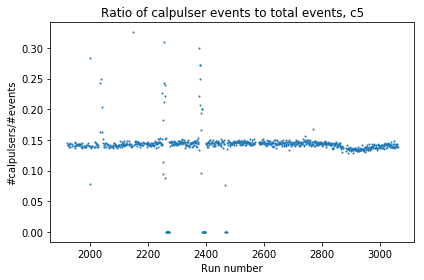

In [63]:
plt.plot(run_number,ratio_value, "o", markersize=1)
# plt.xlim(1800,4000)
plt.ylabel("#calpulsers/#events")
plt.xlabel("Run number")
plt.title("Ratio of calpulser events to total events, c5")
plt.tight_layout()
#plt.xlim(1400,2000)
plt.savefig("calpulsers_c5.png", dpi=200)